# Project Setup
We first check what we are working with and will set the colab environment up to meet our requirements. 

## Step 1: Clone the repository

In [1]:
!git clone https://github.com/benearnthof/open_science_mnist.git

Cloning into 'open_science_mnist'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 119 (delta 1), reused 0 (delta 0), pack-reused 111
Receiving objects: 100% (119/119), 182.40 KiB | 16.58 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [2]:
# 'open_science_mnist' & 'sample_data'
!ls

open_science_mnist  sample_data


In [3]:
# sample_data contains mnist in .csv form, we will download the official version of the dataset later. 
# for now we switch to the root directory of our project
%cd /content/open_science_mnist
!pwd

/content/open_science_mnist
/content/open_science_mnist


In [4]:
# if cloning was a success & the working directory got adjusted this should 
# yield the contents of the outermost layer of the github repo
!ls

data	__init__.py  open_science_mnist.ipynb  Pipfile.lock  scripts
images	LICENSE      Pipfile		       README.md     src


In [5]:
# We are working with pip version 22.0.4 and python 3.8
!pip --version

pip 22.0.4 from /usr/local/lib/python3.8/dist-packages/pip (python 3.8)


In [6]:
# installing pipenv
!pip install --user pipenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 24.3 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
# add the location of the pipenv scripts to $PATH
import os
os.environ['PATH'] += ':/root/.local/bin'

In [8]:
# this should now have /root/.local/bin added at the end
! echo $PATH

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/root/.local/bin


In [9]:
# setting up a virtualenv for this project
!pipenv install

Creating a virtualenv for this project...
Pipfile: /content/open_science_mnist/Pipfile
Using /usr/local/bin/python (3.8.16) to create virtualenv...
⠴ Creating virtual environment...created virtual environment CPython3.8.16.final.0-64 in 1119ms
  creator CPython3Posix(dest=/root/.local/share/virtualenvs/open_science_mnist-fq3yB1ln, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==22.3.1, setuptools==65.6.3, wheel==0.38.4
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator

✔ Successfully created virtual environment!
⠴ Creating virtual environment...
Virtualenv location: /root/.local/share/virtualenvs/open_science_mnist-fq3yB1ln
Installing dependencies from Pipfile.lock (0875e4)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command in

In [10]:
!pipenv graph

albumentations==1.3.0
  - numpy [required: >=1.11.1, installed: 1.24.1]
  - opencv-python-headless [required: >=4.1.1, installed: 4.7.0.68]
    - numpy [required: >=1.17.0, installed: 1.24.1]
    - numpy [required: >=1.17.3, installed: 1.24.1]
  - PyYAML [required: Any, installed: 6.0]
  - qudida [required: >=0.0.4, installed: 0.0.4]
    - numpy [required: >=0.18.0, installed: 1.24.1]
    - opencv-python-headless [required: >=4.0.1, installed: 4.7.0.68]
      - numpy [required: >=1.17.0, installed: 1.24.1]
      - numpy [required: >=1.17.3, installed: 1.24.1]
    - scikit-learn [required: >=0.19.1, installed: 1.2.0]
      - joblib [required: >=1.1.1, installed: 1.2.0]
      - numpy [required: >=1.17.3, installed: 1.24.1]
      - scipy [required: >=1.3.2, installed: 1.10.0]
        - numpy [required: >=1.19.5,<1.27.0, installed: 1.24.1]
      - threadpoolctl [required: >=2.0.0, installed: 3.1.0]
    - typing-extensions [required: Any, installed: 4.4.0]
  - scikit-image [required: >=0.16

If the environment setup worked, the command above should have produced a dependency graph of the required packages. We will now proceed with running our experiments.

# Step 2: Importing the Dataset

In [11]:
# setting up the random seeds of torch, numpy and pythons random module
import random
import torch
import numpy
random.seed(2023)
torch.manual_seed(2023)
numpy.random.seed(2023)

We will make use of the MNIST version the torchvision package provides.

In [12]:
# first we need to import our data loaders for train & test data
from src.dataloader import TrainLoader, TestLoader
# let us first visualize some of the pictures in the dataset
train_loader = TrainLoader()
batch_idx, (data, target) = next(enumerate(train_loader))
data.shape # 32 images with 1 channel and 28 by 28 pixels

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/AlbumentationsMnist/raw/train-images-idx3-ubyte.gz to ../data/AlbumentationsMnist/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/AlbumentationsMnist/raw/train-labels-idx1-ubyte.gz to ../data/AlbumentationsMnist/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/AlbumentationsMnist/raw/t10k-images-idx3-ubyte.gz to ../data/AlbumentationsMnist/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/AlbumentationsMnist/raw/t10k-labels-idx1-ubyte.gz to ../data/AlbumentationsMnist/raw



torch.Size([32, 1, 28, 28])

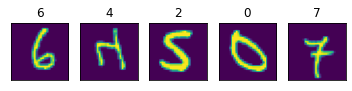

In [13]:
from src.utils import quick_plot, plot_25, plot_1
# quick verification if our data loader works correctly
quick_plot(data, target)

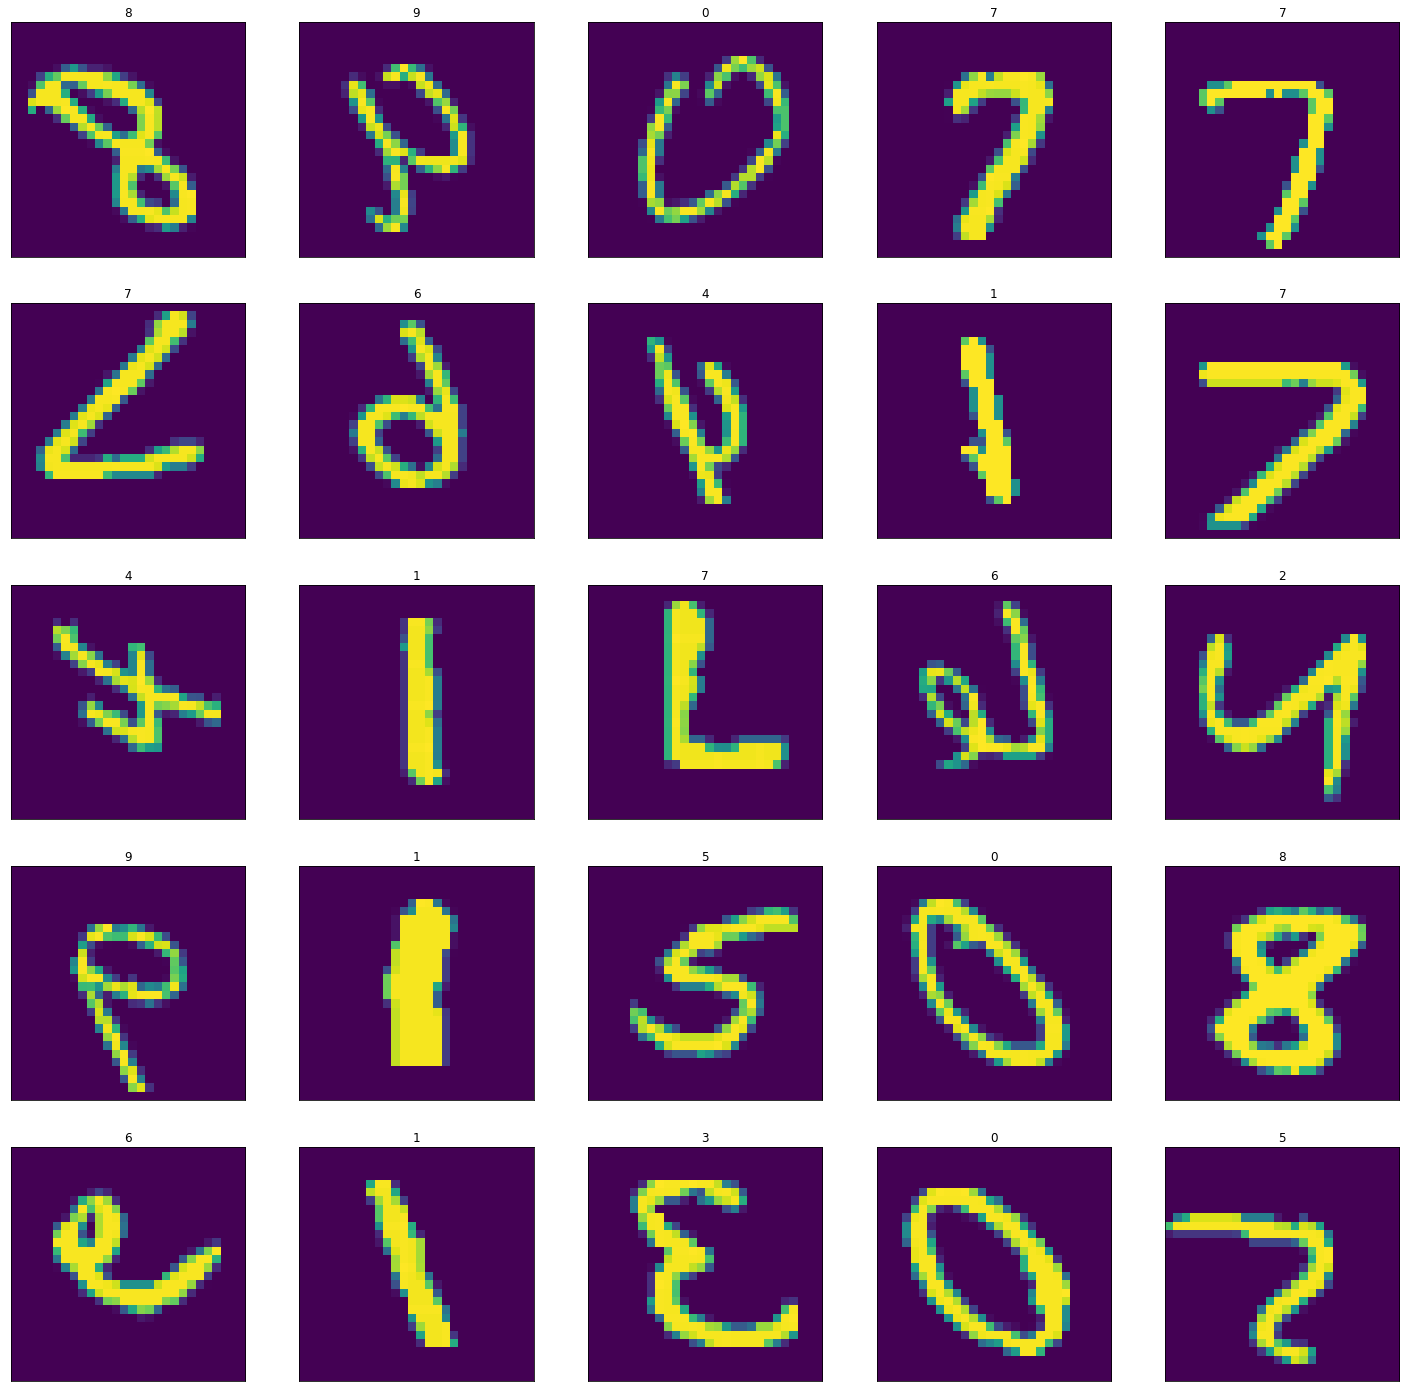

In [14]:
# let's view more digits at once
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()
plot_25(images, labels)

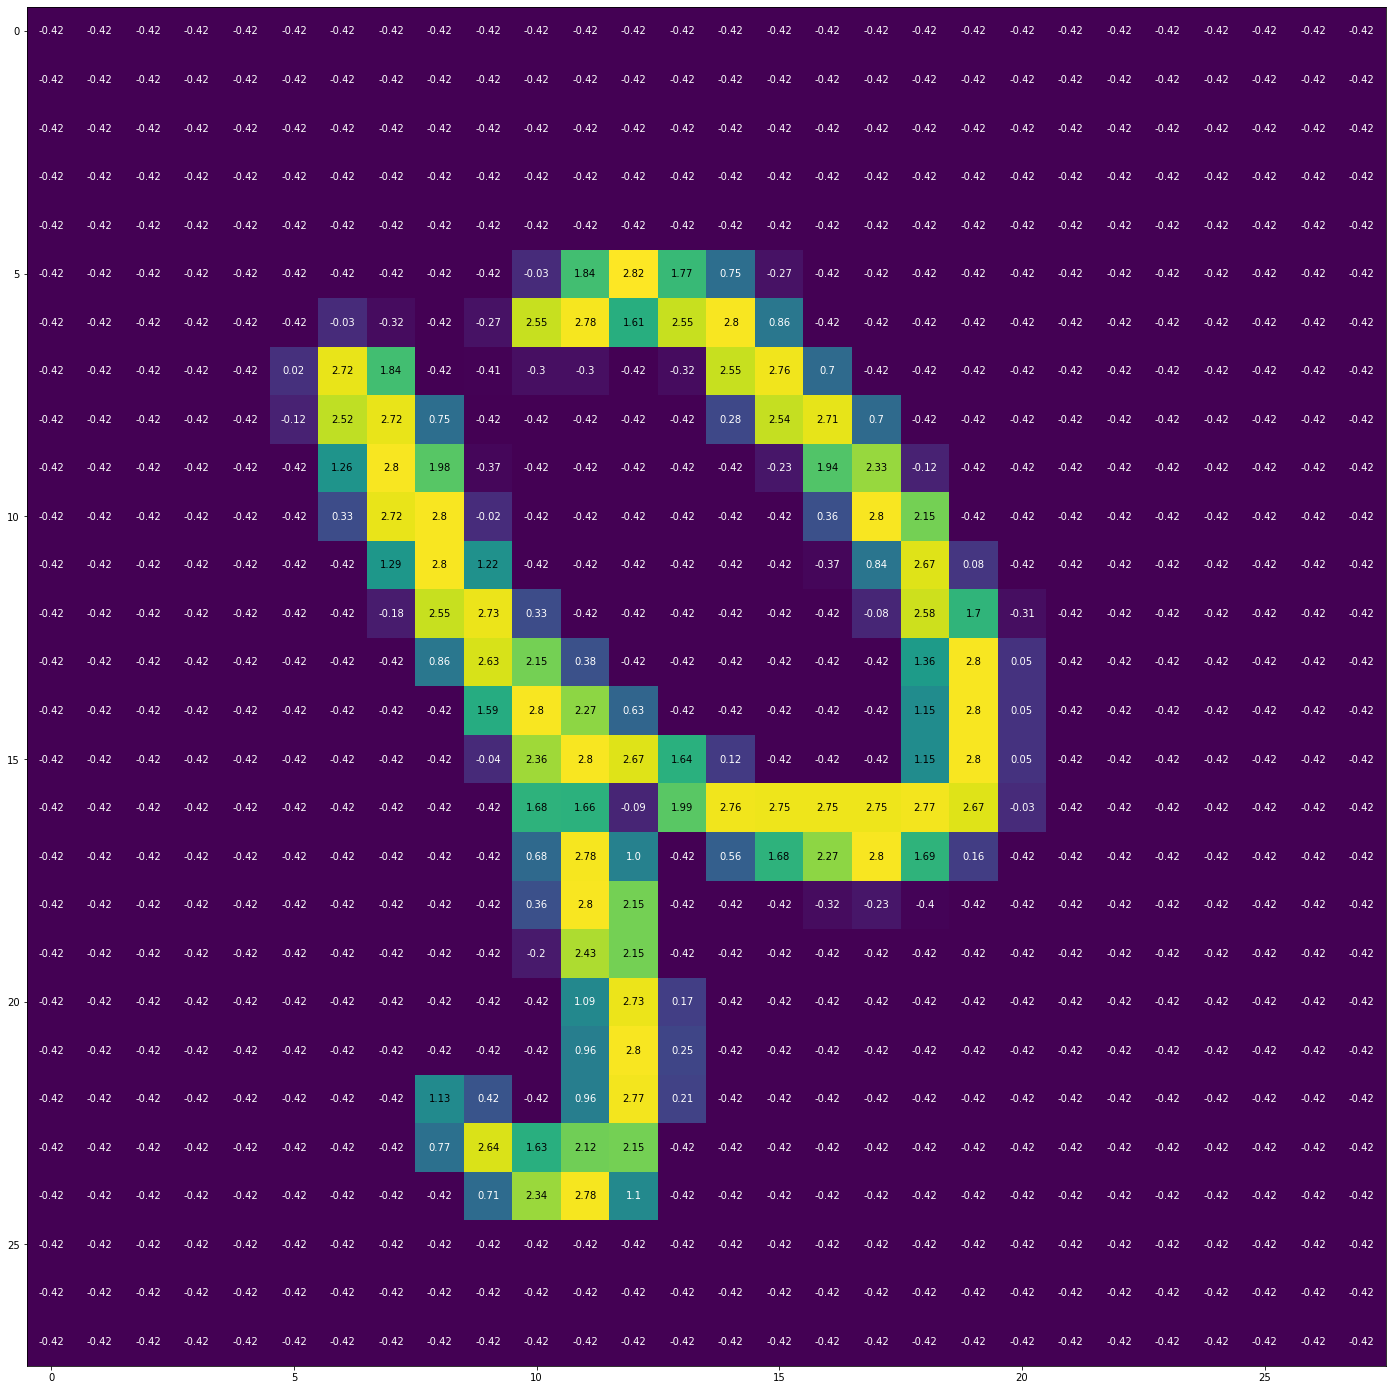

In [15]:
# let's take a closer look at a single digit and its pixel values
from numpy import squeeze
img = squeeze(images[1])
plot_1(img)

# Step 3: Setting up the Model

In [16]:
from src.models import ConvNet, FCNet
model = ConvNet()
print(model)

ConvNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


# Step 4: Train the Model

In [17]:
from scripts.train import train_model
from src.utils import Parameters

# modify Parameters in src/utils.py to adjust epochs & lr if needed
params = Parameters()

train_model(model, params, train_loader)

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch: 1 	Training Loss: 1.0679
Epoch: 2 	Training Loss: 0.7089
Epoch: 3 	Training Loss: 0.5633
Epoch: 4 	Training Loss: 0.4837
Epoch: 5 	Training Loss: 0.4315
Epoch: 6 	Training Loss: 0.3986
Epoch: 7 	Training Loss: 0.3711
Epoch: 8 	Training Loss: 0.3509
Epoch: 9 	Training Loss: 0.3374
Epoch: 10 	Training Loss: 0.3266


In [18]:
from scripts.eval import test_model
from src.dataloader import TestLoader

test_loader = TestLoader()
test_model(model, test_loader)

Test Loss: 0.107611

Test Accuracy of     0: 99% (971/980)
Test Accuracy of     1: 99% (1126/1135)
Test Accuracy of     2: 95% (983/1032)
Test Accuracy of     3: 96% (972/1010)
Test Accuracy of     4: 97% (961/982)
Test Accuracy of     5: 94% (839/892)
Test Accuracy of     6: 96% (923/958)
Test Accuracy of     7: 94% (969/1028)
Test Accuracy of     8: 98% (963/974)
Test Accuracy of     9: 94% (951/1009)

Test Accuracy (Overall): 96% (9658/10000)


In [19]:
# to install individual packages:
# !pipenv install albumentations


In [20]:
!pipenv graph

albumentations==1.3.0
  - numpy [required: >=1.11.1, installed: 1.24.1]
  - opencv-python-headless [required: >=4.1.1, installed: 4.7.0.68]
    - numpy [required: >=1.17.0, installed: 1.24.1]
    - numpy [required: >=1.17.3, installed: 1.24.1]
  - PyYAML [required: Any, installed: 6.0]
  - qudida [required: >=0.0.4, installed: 0.0.4]
    - numpy [required: >=0.18.0, installed: 1.24.1]
    - opencv-python-headless [required: >=4.0.1, installed: 4.7.0.68]
      - numpy [required: >=1.17.0, installed: 1.24.1]
      - numpy [required: >=1.17.3, installed: 1.24.1]
    - scikit-learn [required: >=0.19.1, installed: 1.2.0]
      - joblib [required: >=1.1.1, installed: 1.2.0]
      - numpy [required: >=1.17.3, installed: 1.24.1]
      - scipy [required: >=1.3.2, installed: 1.10.0]
        - numpy [required: >=1.19.5,<1.27.0, installed: 1.24.1]
      - threadpoolctl [required: >=2.0.0, installed: 3.1.0]
    - typing-extensions [required: Any, installed: 4.4.0]
  - scikit-image [required: >=0.16